<a href="https://colab.research.google.com/github/antonio2505/SuperDataScience_Projects_ML/blob/main/support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Support Vector Regression (SVM)**

importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import the dataset 

In [5]:
dataset = pd.read_csv('Position_Salaries.csv')

x = dataset.iloc[ : , 1:-1].values
y = dataset.iloc[ : , -1].values

In [7]:
#to apply the feature scaling, reshape the y before to display like the x (2D array)
y = y.reshape(len(y), 1)

Feature scaling 

In [9]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [10]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [11]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Training the SVM on the whole Dataset

In [12]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Predicting a New Result

In [14]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

Visualising the SVR Result

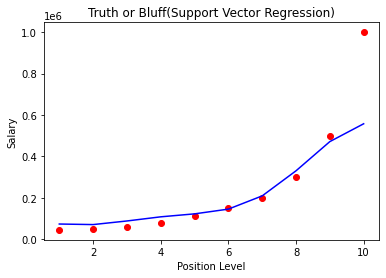

In [16]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x)), color = 'blue')
plt.title('Truth or Bluff(Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Visualising the SVR Result (for Hight Resolution and smoother curve)

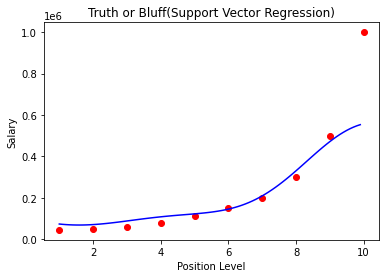

In [17]:

x_grid = np.arange(min(sc_x.inverse_transform(x)),max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape(len(x_grid), 1)

plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))), color = 'blue')
plt.title('Truth or Bluff(Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()